In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


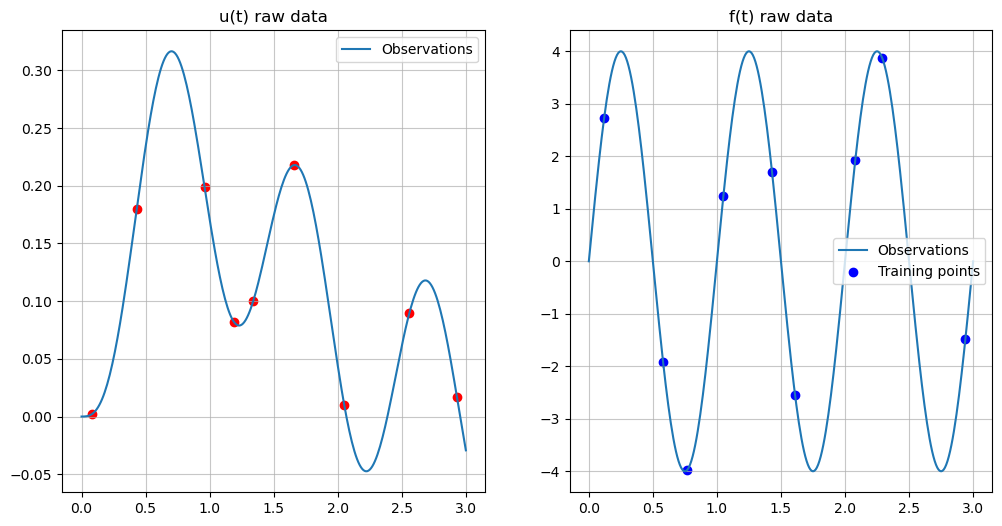

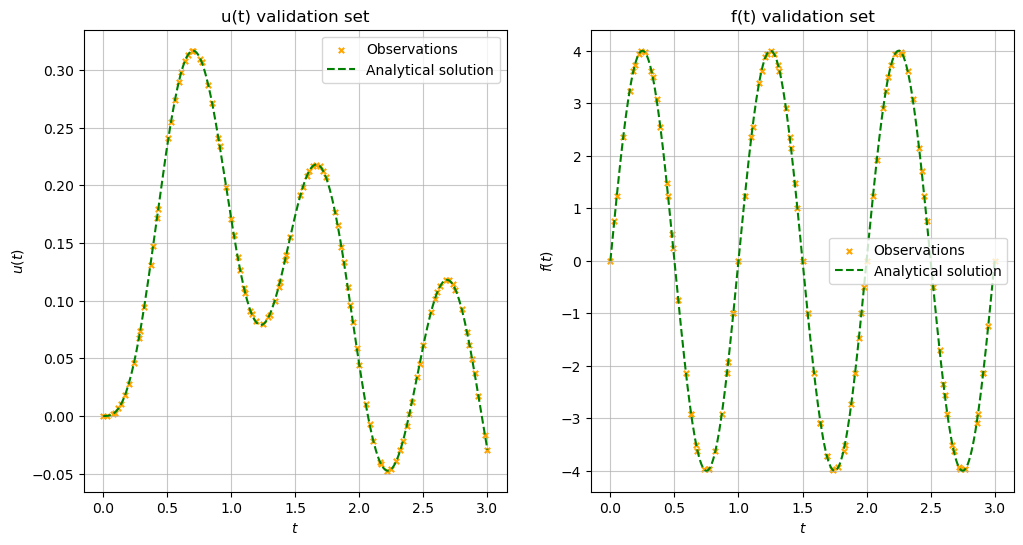

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model.set_training_data("damped_m1k2b2.csv",9,[1e-8,1e-8],seeds_training,9)
model.plot_raw_data(Training_points=True)
model.set_validation_data(100)
model.plot_validation_set()

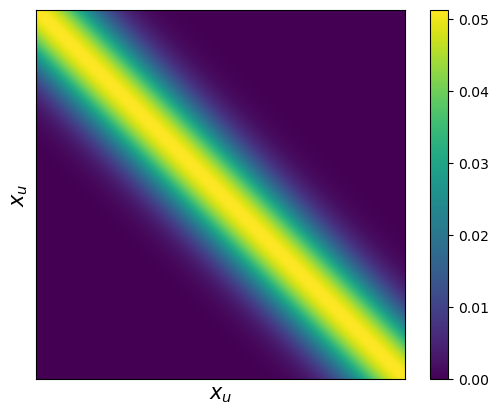

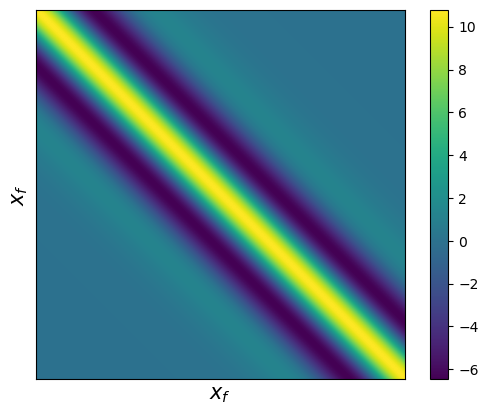

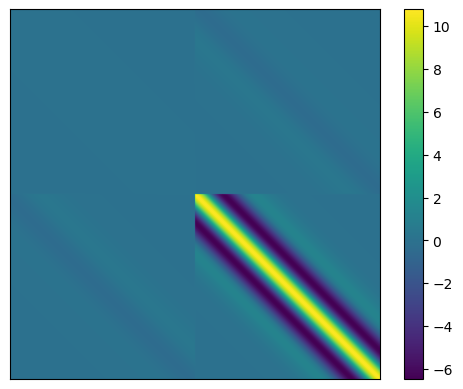

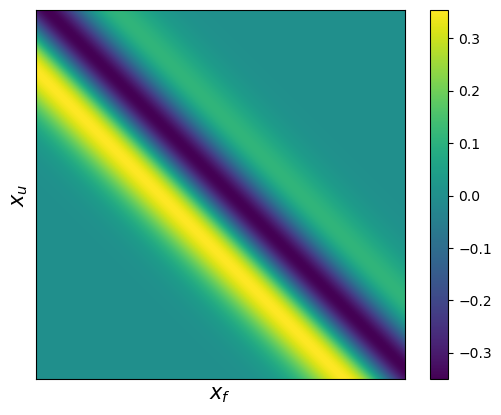

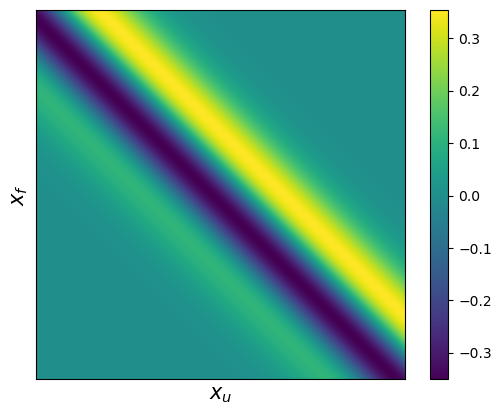

In [4]:
X_1 = np.linspace(0,3,500).reshape(-1,1)
X_2 = np.linspace(0,3,500).reshape(-1,1)
params = np.array([3.392e-01,  2.265e-01,  9.613e-01,  1.948e+00 , 2.211e+00])
K = model.gram_matrix(X_1,X_2,params)
import matplotlib.pyplot as plt
plt.imshow(K[:500,:500])
plt.colorbar()
plt.xlabel(r"$x_u$",fontsize=15)
plt.ylabel(r"$x_u$",fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(K[500:,500:])
plt.xlabel(r"$x_f$",fontsize=15)
plt.ylabel(r"$x_f$",fontsize=15)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(K)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(K[:500,500:])
plt.xlabel(r"$x_f$",fontsize=15)
plt.ylabel(r"$x_u$",fontsize=15)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(K[500:,:500])
plt.xlabel(r"$x_u$",fontsize=15)
plt.ylabel(r"$x_f$",fontsize=15)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

In [79]:
model.jitter = 1e-7
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 2, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 500, -1

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-4, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 500/500 [00:22<00:00, 22.40it/s]


 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 1.2663798332214355
       x: [ 3.392e-01  2.265e-01  9.613e-01  1.948e+00  2.211e+00]
     nit: 12
     jac: [ 2.306e+01  1.611e-01 -5.138e+01 -2.039e+01  5.638e+00]
    nfev: 95


In [73]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8]),
            "nf_n=9_melder_4000":([0.48909158, 0.58601285, 0.99895693, 1.99258569, 1.99875862],-4.355005264282227, [1e-8,1e-8])}
#final example for now
# # # fun: -3.5418262481689453
# # #      jac: array([ 15.5      ,  -1.125    , 233.375    ,  24.640625 ,   3.1523438],
# # #       dtype=float32)
# # #  message: 'Converged (|f_n-f_(n-1)| ~= 0)'
# # #     nfev: 58
# # #      nit: 7
# # #   status: 1
# # #  success: True
# # #        x: array([0.50706766, 0.63494682, 0.99997171, 2.00199666, 2.00654081])

In [12]:
model.set_params([0.50706766, 0.63494682, 0.99997171, 2.00199666, 2.00654081])
X_star = np.linspace(0,3,150).reshape(-1,1)

 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:598: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:599: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:612: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:613: RuntimeWarning:invalid value encountered in sqrt


{'u': 0.0018989613290600086, 'f': 0.01070560795785095}

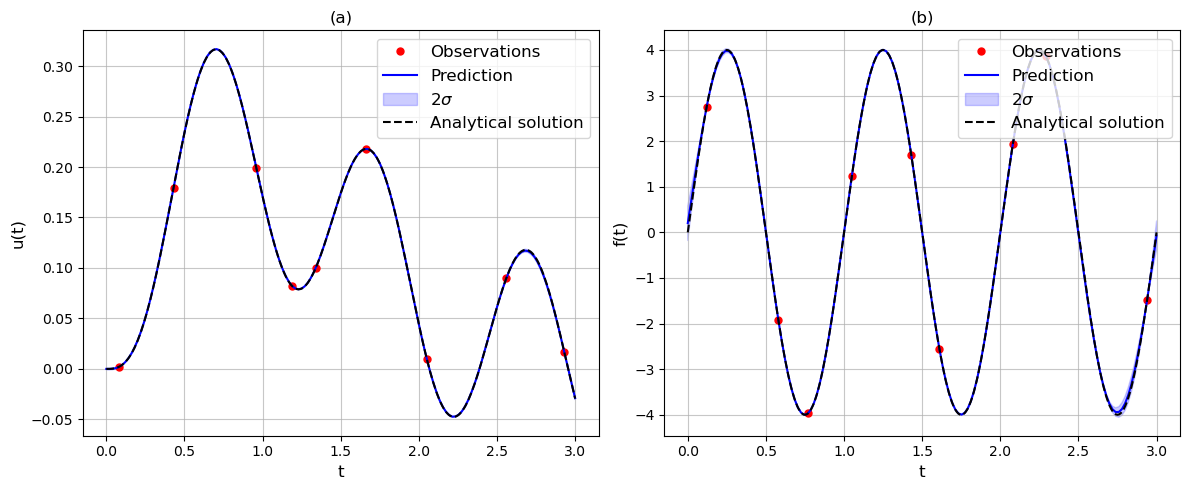

In [13]:

model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.rel_l2_error



 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1146: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1147: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1160: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1161: RuntimeWarning:invalid value encountered in sqrt


---------GPY--------
L_sq u:  0.15687914146549406
L_sq f:  0.5938403446631281


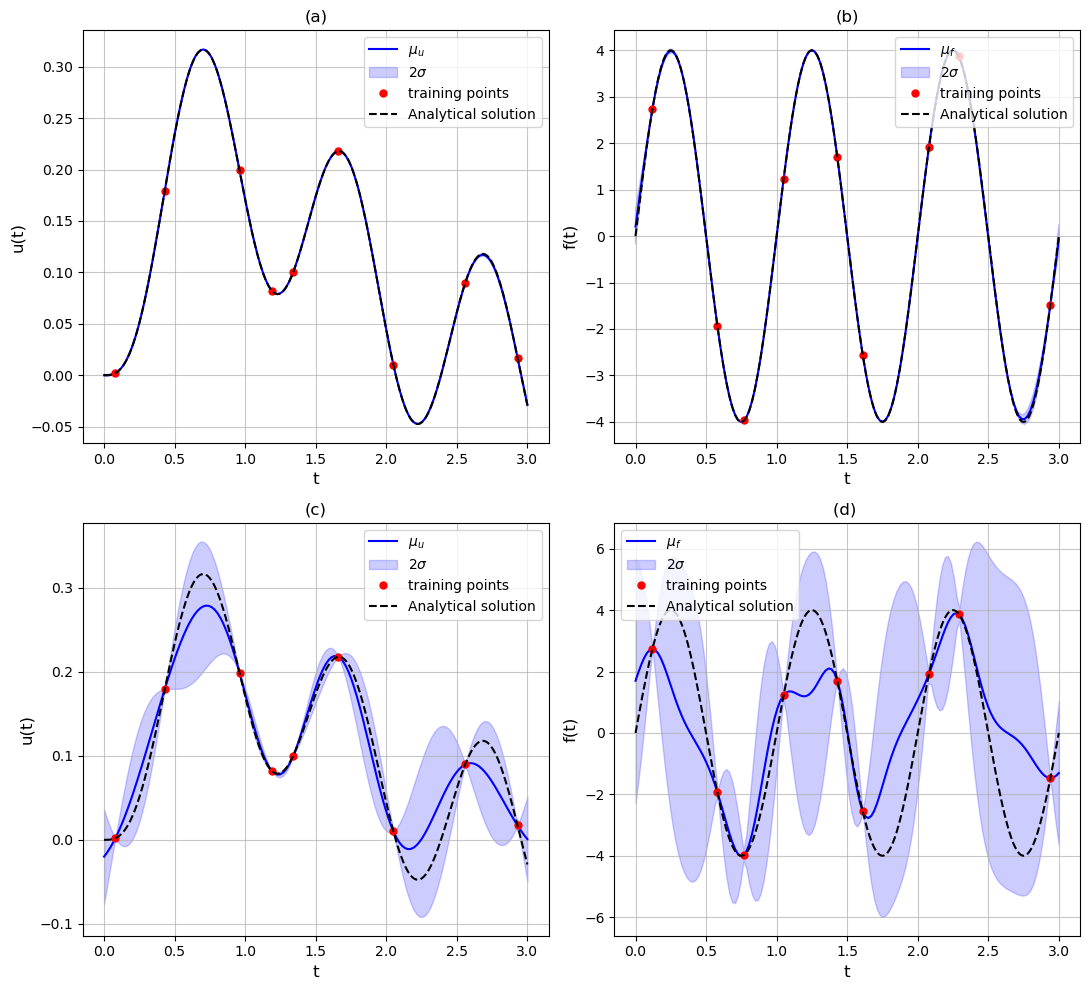

In [14]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


{'l': 1.0, 'sigma_f': 1.0, 'm': 1.0, 'b': 1.0, 'k': 1.0}

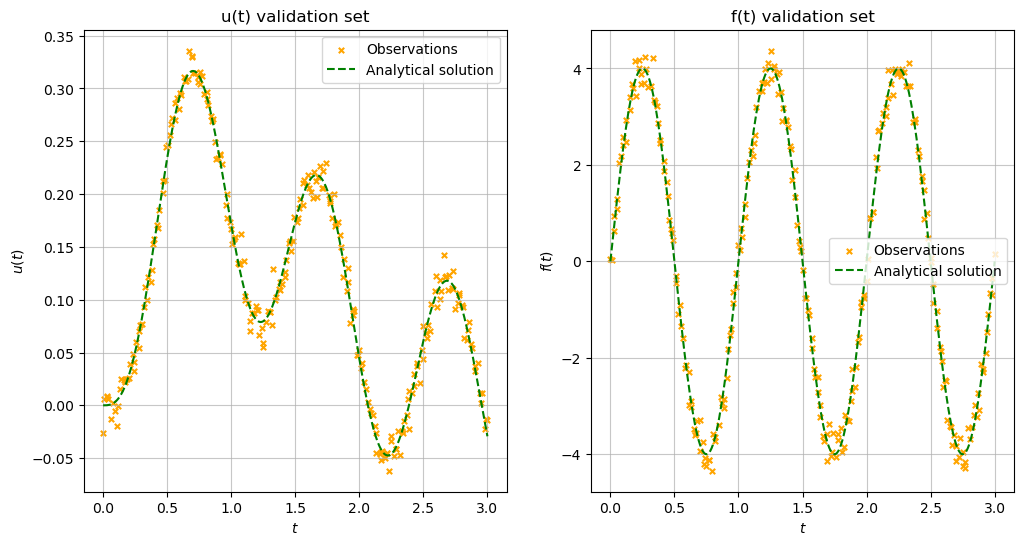

In [21]:
seeds_training = [50,38]
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model2.set_training_data("damped_m1k2b2.csv",9,[1e-4,5*1e-2],seeds_training,9)
model2.set_validation_data(250)
model2.plot_validation_set()
#model2.plot_raw_data(Training_points=True)
model2.params


In [22]:
n_iterations, n_threads = 100,12
model2.jitter = 0
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 2, 1)
    theta_initial[2] = rng.uniform(0, 6, 1)
    theta_initial[3] = rng.uniform(0, 6, 1)
    theta_initial[4] = rng.uniform(0, 6, 1)
    return theta_initial

model2.train("Nelder-Mead",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)

100%|██████████| 100/100 [00:02<00:00, 43.92it/s]


Theta:  [0.36779559 0.25969426 0.96281336 1.57964982 1.11501712] 
 Log marginal likelihood:  3.106804370880127


In [31]:
#100%|██████████| 2000/2000 [01:21<00:00, 24.46it/s]
#Theta:  [0.38599102 0.26671737 1.00534741 2.41785721 1.50394315] 
# Log marginal likelihood:  3.3947739601135254

-----------------------------------------------
GP with kernel: 
Training data: (9, 1)
Training targets: (18, 1)
Hyperparameters: {'l': 0.36779558818918723, 'sigma_f': 0.25969425962763343, 'm': 0.9628133574992987, 'b': 1.579649824404335, 'k': 1.115017115152281}
Log marginal likelihood: 3.106804370880127
Mean squared error: {'u': 0.00025899073807522655, 'f': 0.17709296941757202}
Relative l2 error: {'u': 0.10466471198869391, 'f': 0.14859762254116746}
-----------------------------------------------



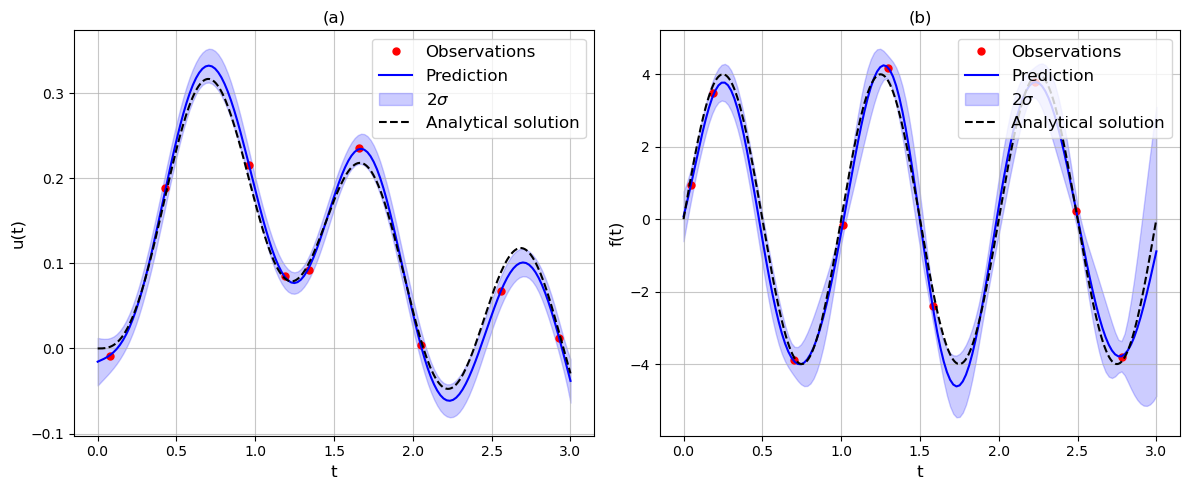

In [23]:
model2.predict_model(X_star)
model2.plot_prediction(X_star,"oscillator_with_noise.png","oscillator_noise.png")
model2.error()

model2.get_params()
print(model2)
#model2.plot_merged_1d_plots(X_star, "o",(11,10))

fun: 3.555784225463867  
     jac: array([-0.06851196,  0.01727295, -0.0453949 ,  0.00055313, -0.00218439],  
      dtype=float32) 
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'   
    nfev: 96   
     nit: 18   
  status: 1 
 success: True 
       x: array([0.36329879, 0.25175648, 0.9802112 , 1.71165971, 0.95101893]) 
{'u': 0.07846240055987475, 'f': 0.1390139924376683}   

 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


This is model with n =  4


100%|██████████| 600/600 [00:14<00:00, 40.58it/s]
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.12331879 0.14215288 0.23589367 0.11385237 2.38770664] 
 Log marginal likelihood:  4.217562198638916
-----------------------------------------------------------
This is model with n =  5


100%|██████████| 600/600 [00:14<00:00, 42.77it/s]
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [ 0.51558943  0.21068503  3.08046043  3.11469155 10.1302155 ] 
 Log marginal likelihood:  3.7263994216918945
-----------------------------------------------------------
This is model with n =  6


100%|██████████| 600/600 [00:14<00:00, 42.57it/s]
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.39765308 0.1819285  1.54063079 3.24902189 0.01376559] 
 Log marginal likelihood:  4.983282089233398
-----------------------------------------------------------
This is model with n =  7


100%|██████████| 600/600 [00:12<00:00, 46.62it/s]
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:607: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:608: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.41254516 0.26062995 0.97580985 2.2954387  0.01741978] 
 Log marginal likelihood:  3.543560743331909
-----------------------------------------------------------
This is model with n =  8


100%|██████████| 600/600 [00:12<00:00, 48.20it/s]
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.44409435 0.32502965 0.9641754  2.0658522  0.58897547] 
 Log marginal likelihood:  0.7963428497314453
-----------------------------------------------------------
This is model with n =  9


100%|██████████| 600/600 [00:13<00:00, 44.98it/s]
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:607: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:608: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.44107793 0.34689115 0.99578952 1.97098923 1.96024345] 
 Log marginal likelihood:  -3.0598888397216797
-----------------------------------------------------------
This is model with n =  10


100%|██████████| 600/600 [00:12<00:00, 47.68it/s]
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:607: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:608: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Theta:  [0.44449361 0.34972029 0.99702004 1.99125237 1.99553931] 
 Log marginal likelihood:  -7.903714179992676
-----------------------------------------------------------
This is model with n =  12


100%|██████████| 600/600 [00:11<00:00, 52.19it/s]
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:593: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:594: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:607: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:608: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Use

Theta:  [0.50779074 0.67269883 0.9999974  2.00252756 2.00512018] 
 Log marginal likelihood:  -16.504236221313477
-----------------------------------------------------------
This is model with n =  15


100%|██████████| 600/600 [00:10<00:00, 54.79it/s]


Theta:  [0.49462723 0.54902718 1.00088288 1.99778293 2.00257425] 
 Log marginal likelihood:  -30.88515853881836
-----------------------------------------------------------
This is model with n =  4


 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:593: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:594: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:607: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:608: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.6207504746357062
L2 f:  0.9387058732554174
This is model with n =  5


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.5049818527247273
L2 f:  0.9240580625426983
This is model with n =  6


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.5709377212984046
L2 f:  0.9211775517890047
This is model with n =  7


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.3780386956140075
L2 f:  0.911283439806441
This is model with n =  8


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.26438519705419833
L2 f:  0.5773283933760652
This is model with n =  9


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.153052649988034
L2 f:  0.5807418142264673
This is model with n =  10


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.0674591363345189
L2 f:  0.3990042892767929
This is model with n =  12


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.0077334772797354
L2 f:  0.07020603141452378
This is model with n =  15


 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


---------GPY--------
L2 u:  0.0028974114779822353
L2 f:  0.004112410882254724


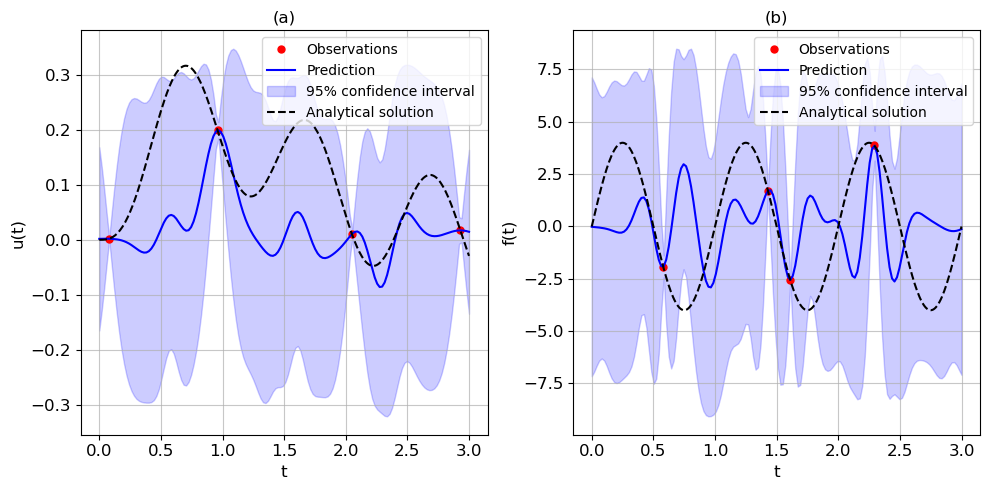

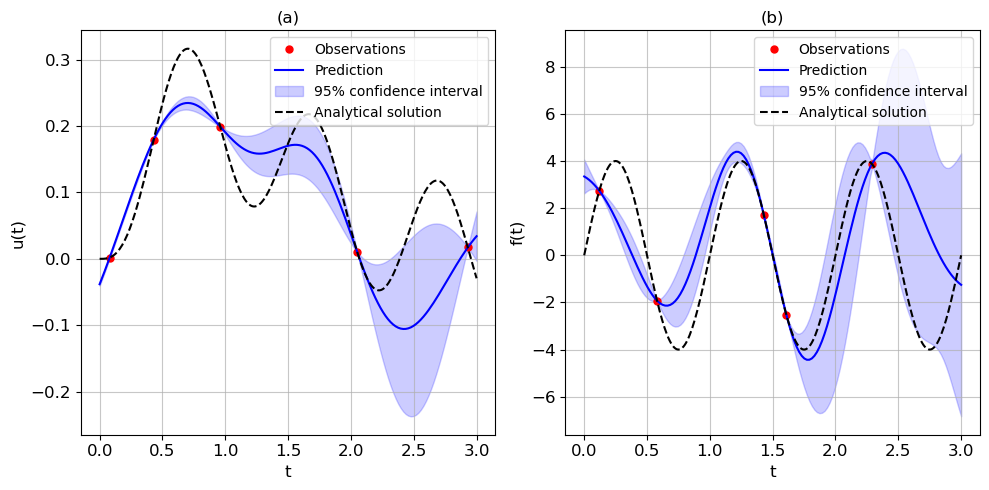

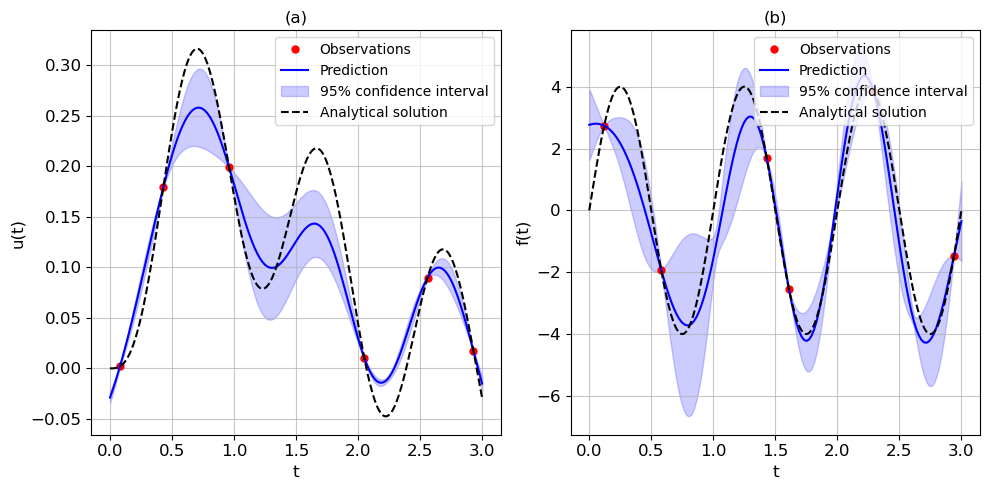

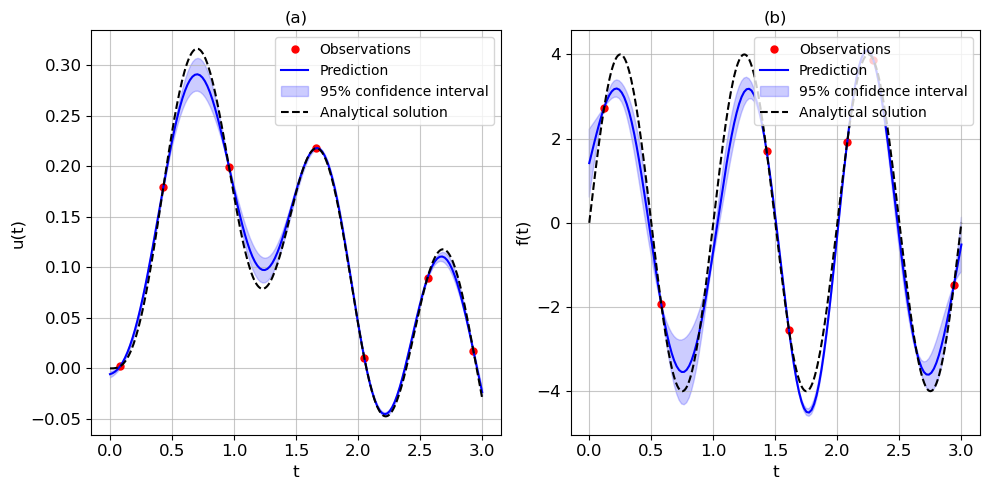

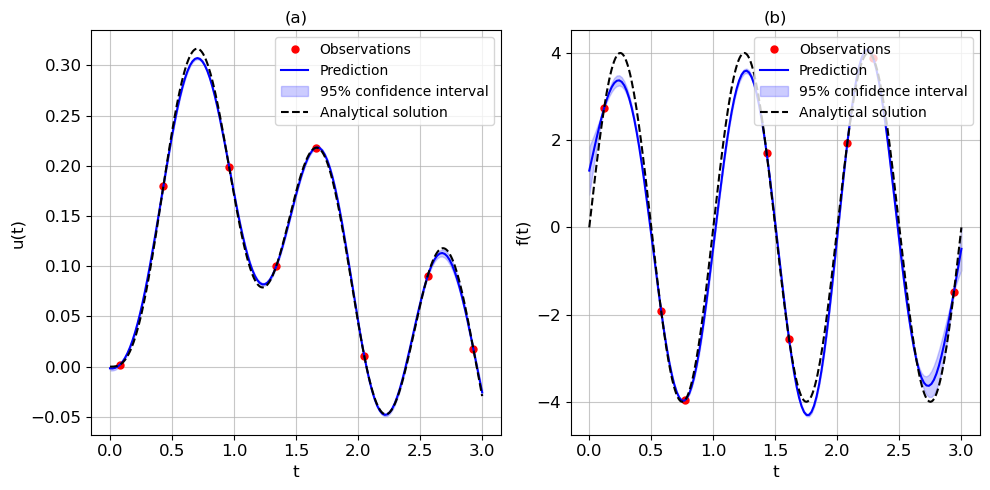

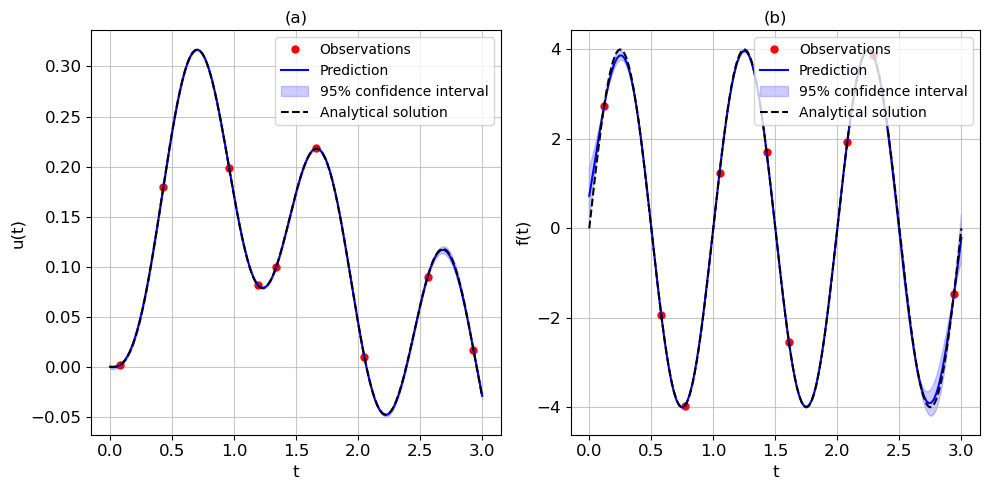

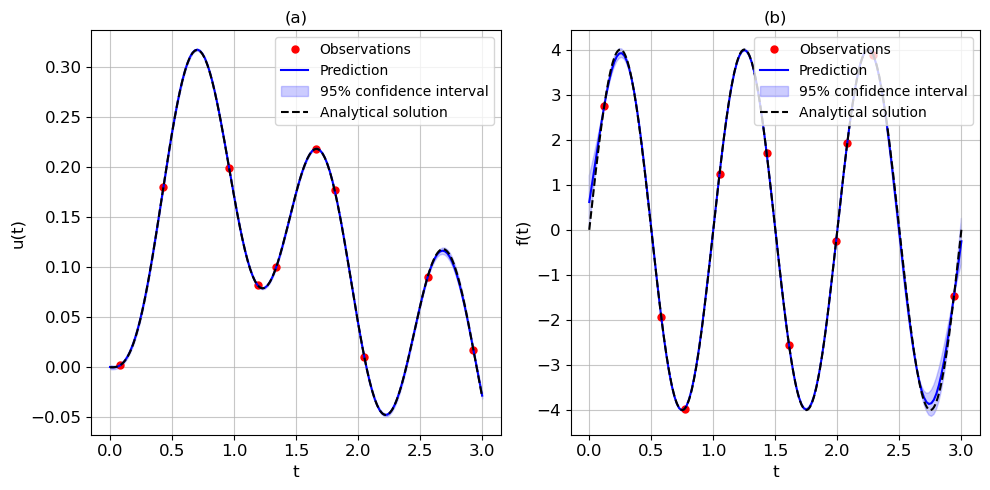

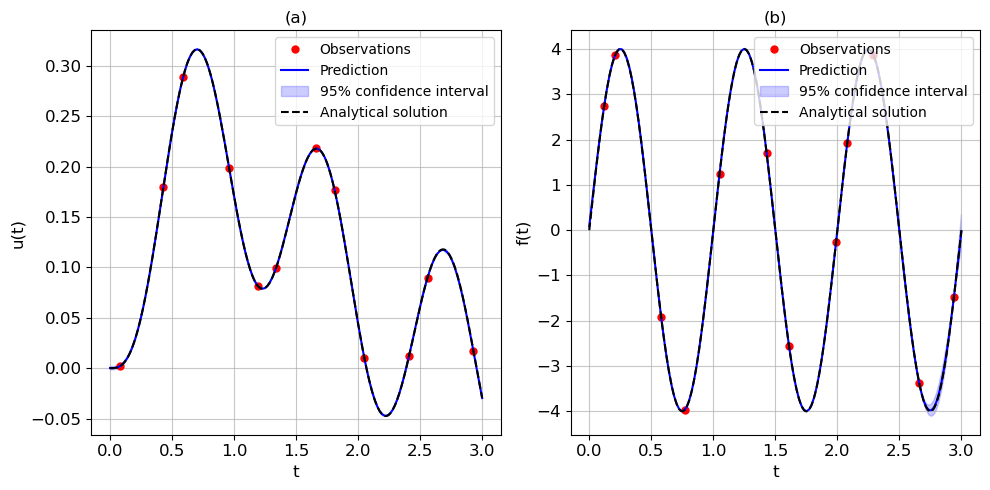

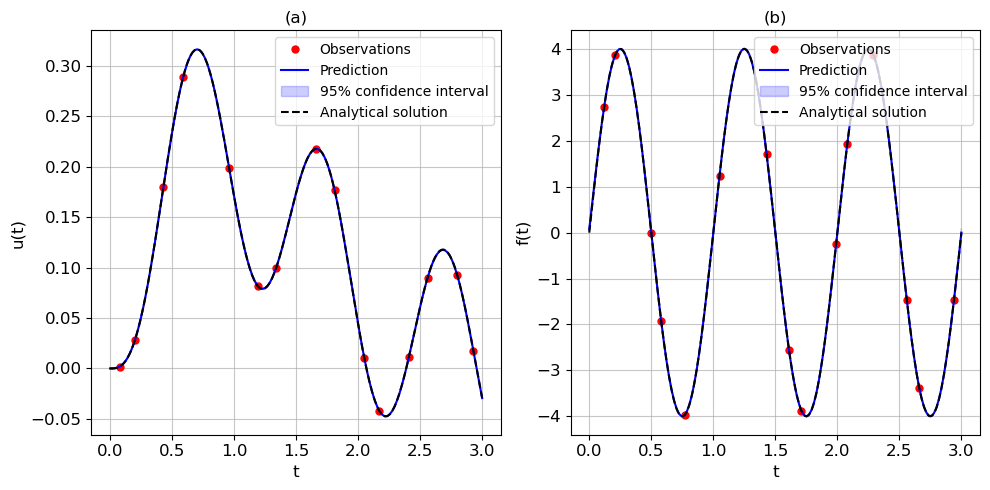

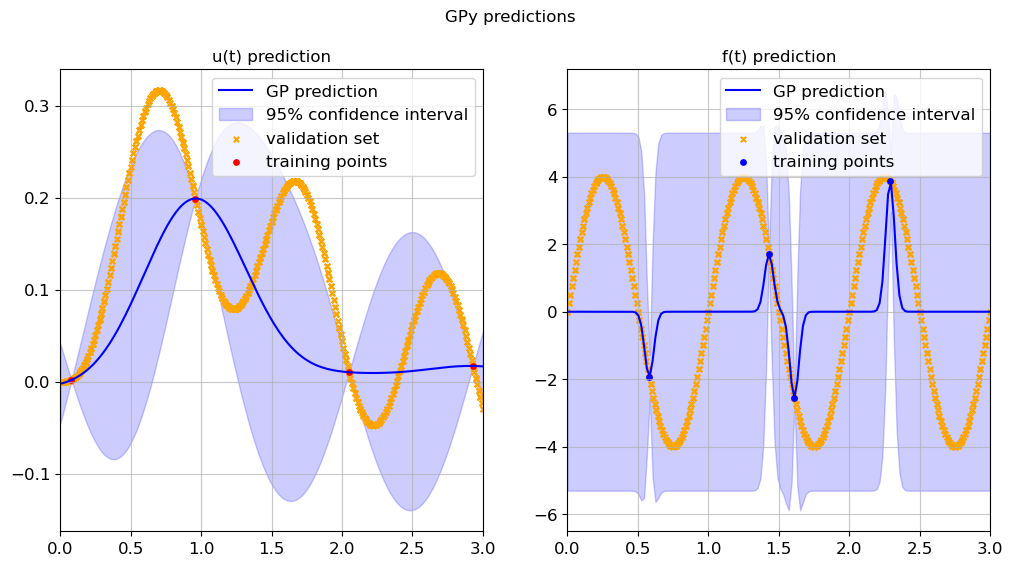

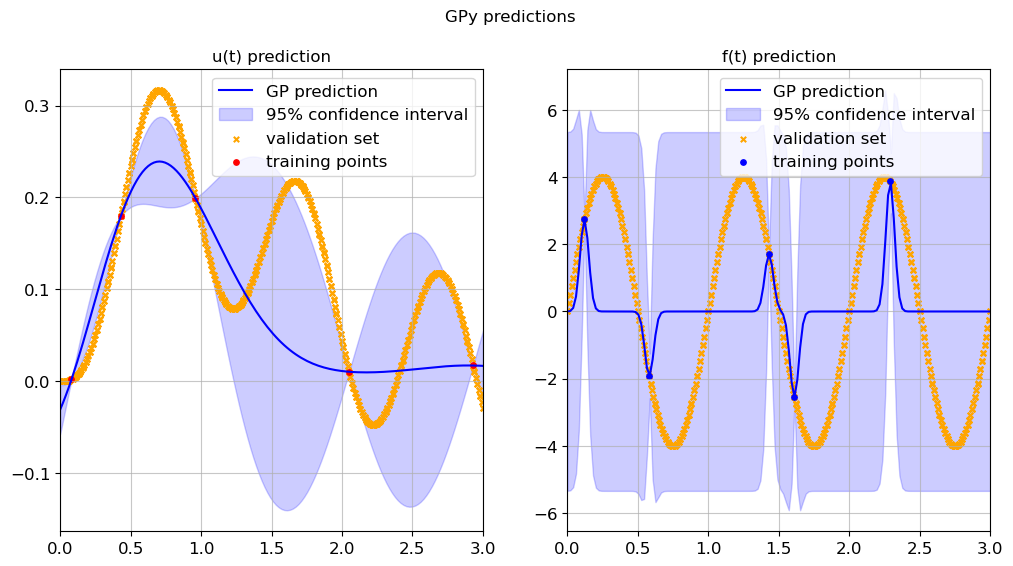

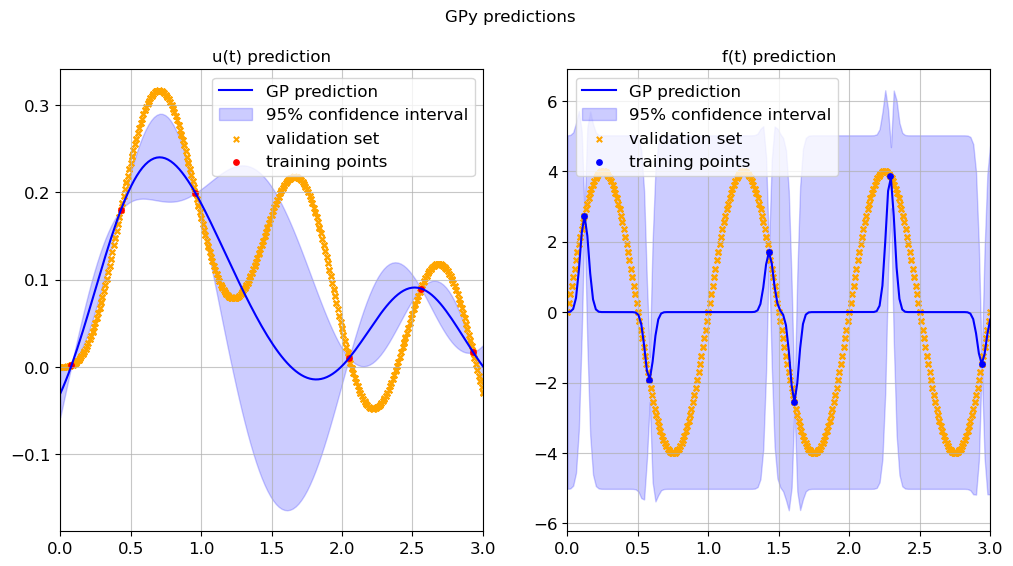

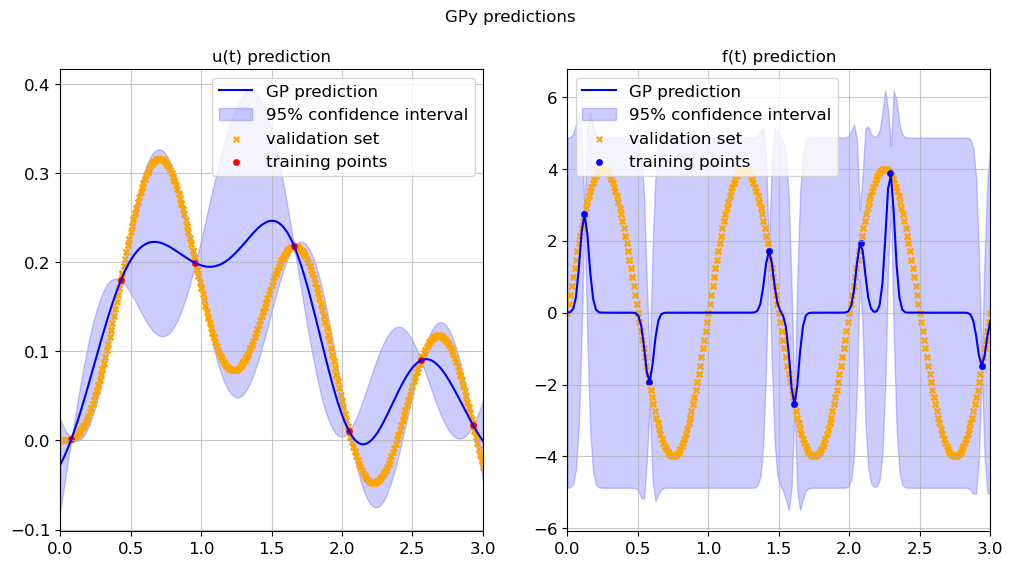

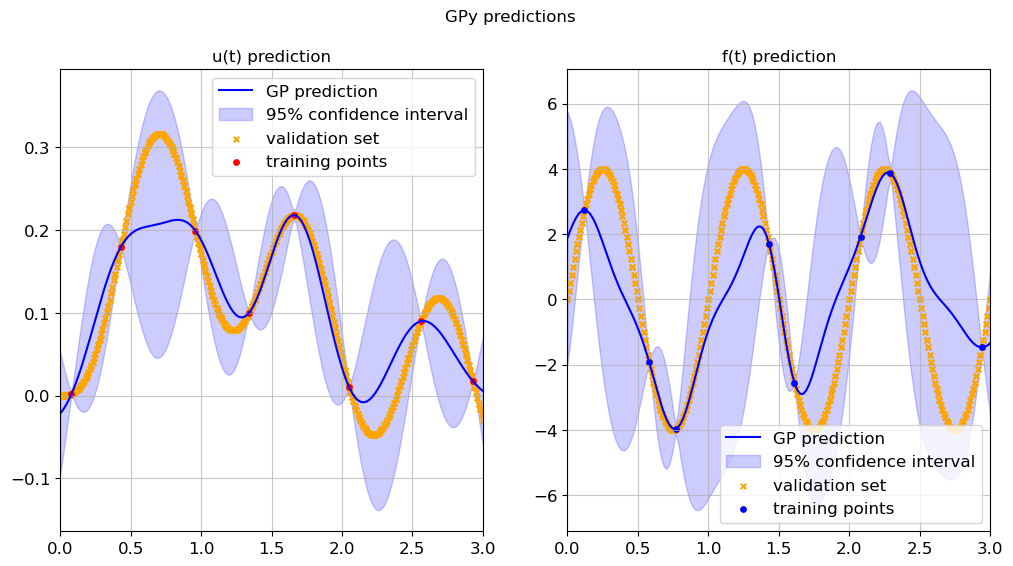

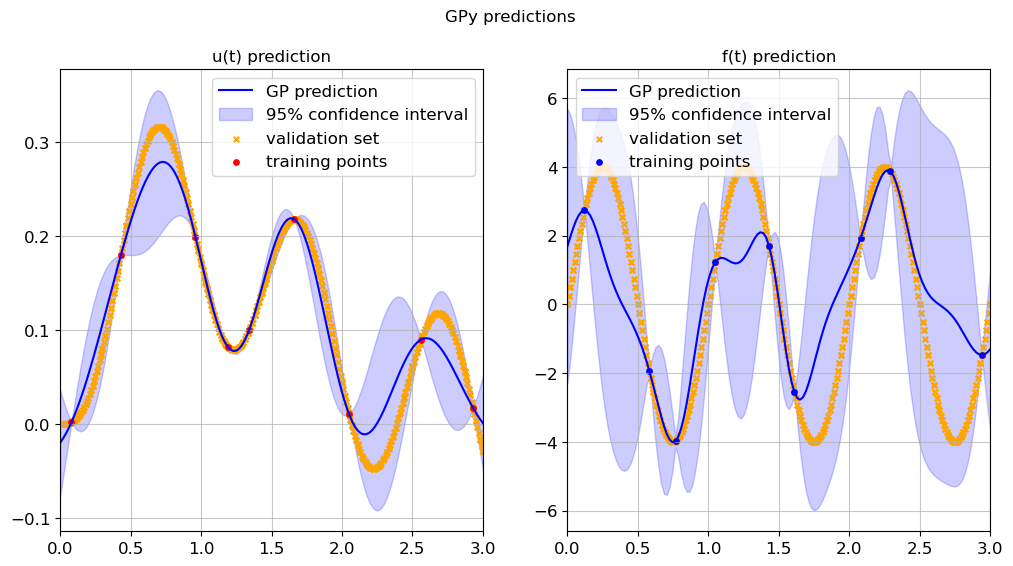

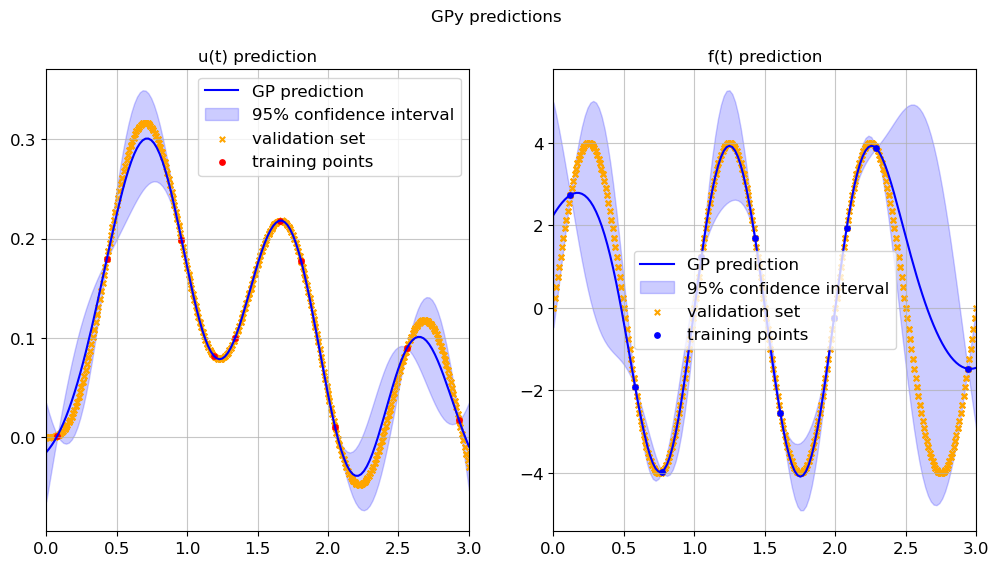

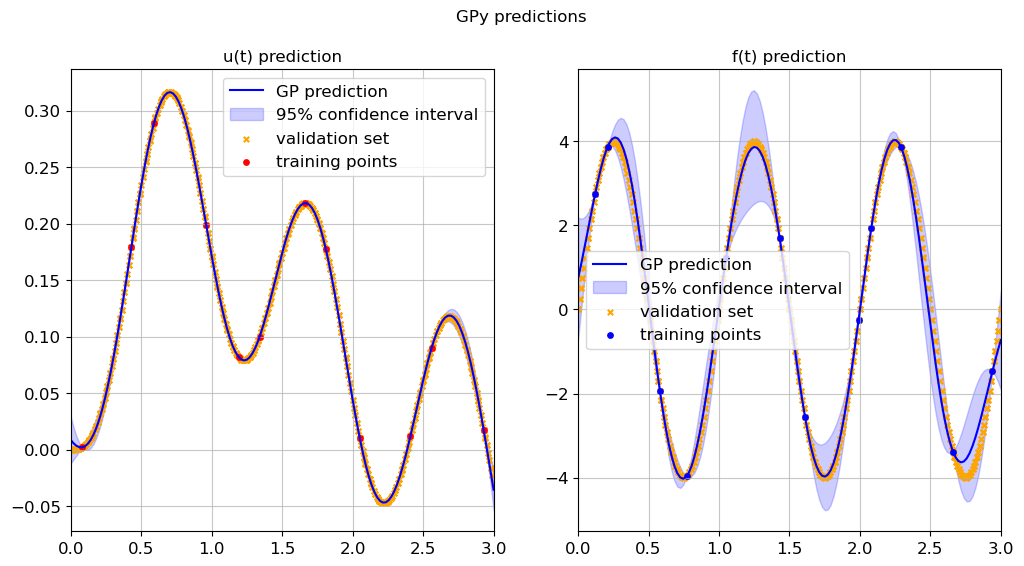

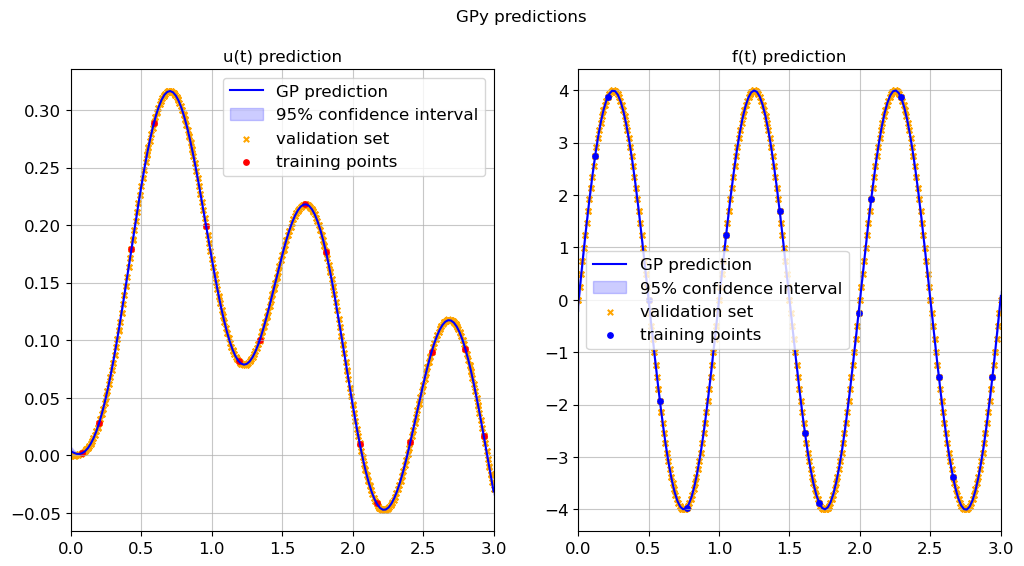

In [44]:
X_star = np.linspace(0,3,150).reshape(-1,1)

def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations = 600
models = []
l_2_errors = []
l_2_errors_gpy = []
n_training = [4,5,6,7,8,9,10,12,15]
for n in n_training:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
    modeln.jitter = 5*1e-7
    modeln.set_training_data("damped_m1k2b2.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.train("Nelder-Mead",n_iterations,12,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-4, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
    modeln.predict_model(X_star)
    modeln.plot_prediction(X_star,"",None)
    modeln.error()
    #modeln.MSE
    #print(modeln)
    #print(model.rel_l2_error)
    models.append(modeln)
    l_2_errors.append(modeln.rel_l2_error)
    print("-----------------------------------------------------------")
for n in n_training:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
    modeln.jitter = 1e-6
    modeln.set_training_data("damped_m1k2b2.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.use_GPy(X_star)
    l_2_errors_gpy.append(modeln.rel_l2_error)

[0.6207504746357062, 0.5049818527247273, 0.5709377212984046, 0.3780386956140075, 0.26438519705419833, 0.153052649988034, 0.0674591363345189, 0.0077334772797354, 0.0028974114779822353]
[{'u': 0.8691951610348921, 'f': 1.0918691197002581}
 {'u': 0.4887322418268105, 'f': 0.7878486996487938}
 {'u': 0.23113917465325154, 'f': 0.3306138146704419}
 {'u': 0.06631214271090441, 'f': 0.18357030443967345}
 {'u': 0.02536266163712547, 'f': 0.12084717983892335}
 {'u': 0.0027533360365669213, 'f': 0.0331482564218429}
 {'u': 0.0035803533725155914, 'f': 0.030503821225224277}
 {'u': 0.0012806668257040834, 'f': 0.004061027211012694}
 {'u': 0.0008712580691726971, 'f': 0.0026518547832095167}]


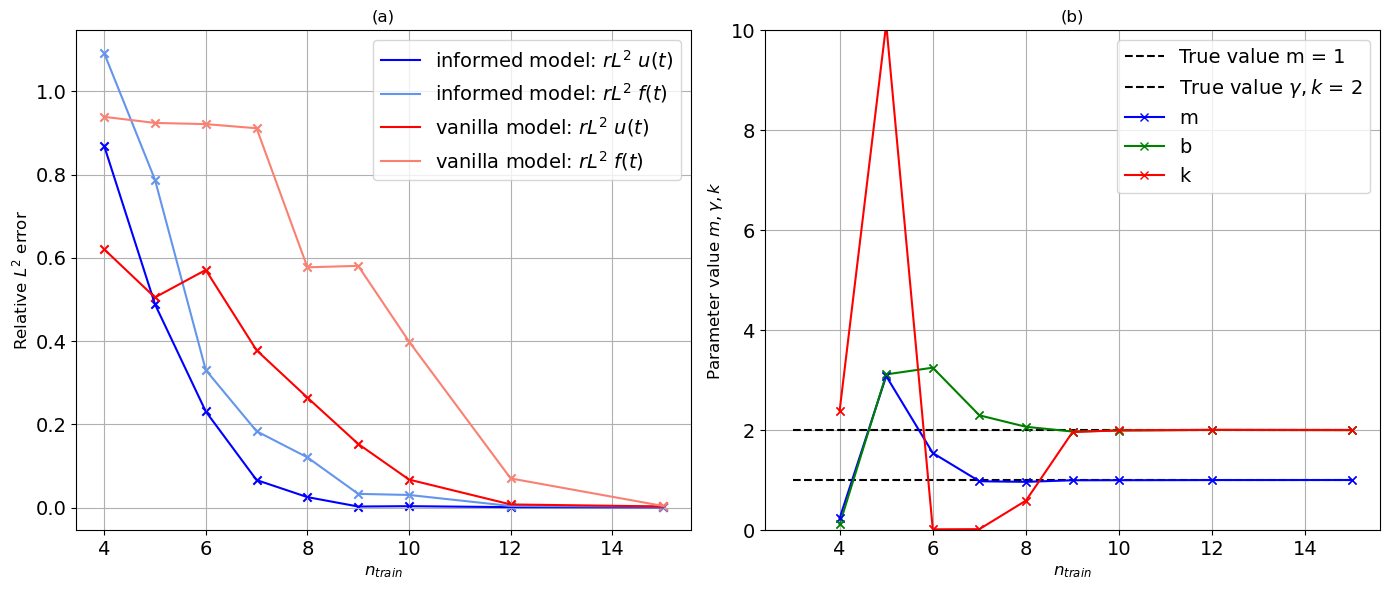

In [12]:
import matplotlib as mpl
import numpy as np
n_training = [4,5,6,7,8,9,10,12,15]
#thetas = [x.params for x in models]
#np.save("thetas.npy",thetas)
#np.save("l_2_errors.npy",l_2_errors)
#np.save("l_2_errors_gpy.npy",l_2_errors_gpy)
l_2_errors_gpy = np.load("l_2_errors_gpy.npy",allow_pickle=True)
l_2_errors = np.load("l_2_errors.npy",allow_pickle=True)
thetas = np.load("thetas.npy",allow_pickle=True)
gpy_u_errors = [x['u'] for x in l_2_errors_gpy]
gpy_f_errors = [x['f'] for x in l_2_errors_gpy]
print(gpy_u_errors)
print(l_2_errors)
l2_u = [x['u'] for x in l_2_errors]
l2_f = [x['f'] for x in l_2_errors]
import matplotlib.pyplot as plt
fontsize = 14
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(n_training,l2_u,label = "informed model: $rL^2$ $u(t)$",color = "blue")
ax[0].scatter(n_training,l2_u,marker="x",color = "blue")
ax[0].plot(n_training,l2_f,label = "informed model: $rL^2$ $f(t)$",color = "cornflowerblue")
ax[0].scatter(n_training,l2_f,marker="x",color = "cornflowerblue")

ax[0].plot(n_training,gpy_u_errors,label="vanilla model: $rL^2$ $u(t)$",color = "red")
ax[0].scatter(n_training,gpy_u_errors,marker="x",color = "red")
ax[0].plot(n_training,gpy_f_errors,label="vanilla model: $rL^2$ $f(t)$",color = "salmon")
ax[0].scatter(n_training,gpy_f_errors,marker="x",color = "salmon")

fontsize = 12
ax[0].set_xlabel("$n_{train}$",fontsize=fontsize)
ax[0].grid()
ax[0].set_ylabel("Relative $L^2$ error",fontsize=fontsize)
ax[0].set_title("(a)",fontsize=fontsize)
ax[0].legend()

ax[1].hlines(1,3,15,linestyles="dashed",label="True value m = 1",colors="black")
ax[1].hlines(2,3,15,linestyles="dashed",label="True value $\\gamma,k$ = 2",colors="black")
ax[1].plot(n_training,[x['m'] for x in thetas],label="m",marker="x",alpha=1,color = "blue")
ax[1].plot(n_training,[x['b'] for x in thetas],label="b",marker="x",alpha=1,color= "green")
ax[1].plot(n_training,[x['k'] for x in thetas],label="k",marker="x",alpha=1,color= "red")

ax[1].plot(n_training,[x['m'] for x in thetas],marker="x",linestyle="None",color = "blue")
ax[1].plot(n_training,[x['b'] for x in thetas],marker="x",linestyle="None",color= "green")
ax[1].plot(n_training,[x['k'] for x in thetas],marker="x",linestyle="None",color= "red")
ax[1].legend()
ax[1].set_ylim(0,10)
ax[1].set_xlabel("$n_{train}$",fontsize=fontsize)
ax[1].grid()
ax[1].set_ylabel("Parameter value $m, \\gamma, k$",fontsize=fontsize)
ax[1].set_title("(b)",fontsize=fontsize)
plt.tight_layout()
plt.savefig("l2_error.png")



(300, 5)


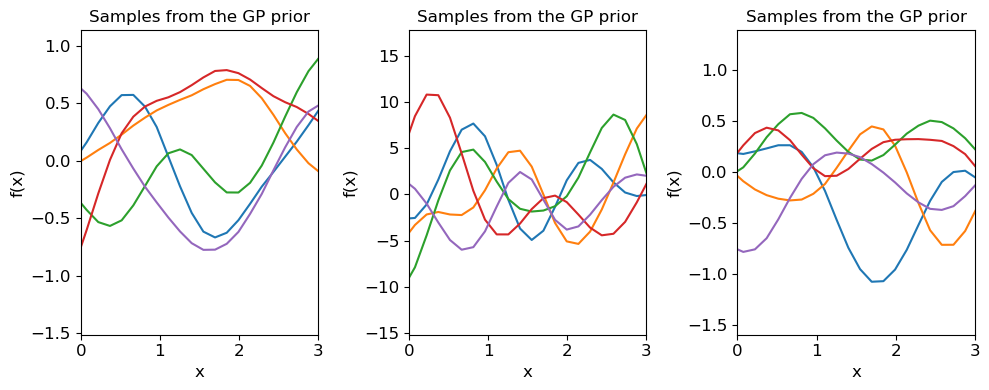

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the GP prior parameters
num_points = 150  # Number of points
rng = np.random.default_rng(seed=1)
#seed


# Define the kernel function (Squared Exponential Kernel)

# Generate random inputs
X = np.linspace(-11, 11, num_points).reshape(-1, 1)
XX = np.vstack((X,X))
params = [0.6,0.5,1,5,1]
# Compute the covariance matrix
K = gram_Matrix(X, X, params)
K2 = k_ff(X,X,params)
K3 = k_uu(X,X,params)
# Cholesky decomposition

L = np.linalg.cholesky(K + 1e-5 * np.eye(num_points*2))
L2 = np.linalg.cholesky(K2 + 1e-5 * np.eye(num_points))
L3 = np.linalg.cholesky(K3 + 1e-5 * np.eye(num_points))
# Generate samples
num_samples = 5
prior_samples = np.dot(L, rng.normal(size=(num_points*2, num_samples)))
prior_samples_2 = np.dot(L2, rng.normal(size=(num_points, num_samples)))
prior_samples_3 = np.dot(L3, rng.normal(size=(num_points, num_samples)))
print(prior_samples.shape)
#prior_samples2 = np.dot(L2, np.random.normal(size=(num_points, num_samples)))
# Plot the samples
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=3)
ax[0].plot(X, prior_samples[:len(X),:])
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].set_title("Samples from the GP prior")
ax[0].set_xlim(0, 3)

ax[1].plot(X, prior_samples_2)
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
ax[1].set_title("Samples from the GP prior")
ax[1].set_xlim(0, 3)

ax[2].plot(X, prior_samples_3)
ax[2].set_xlabel("x")
ax[2].set_ylabel("f(x)")
ax[2].set_title("Samples from the GP prior")
ax[2].set_xlim(0, 3)

plt.tight_layout()




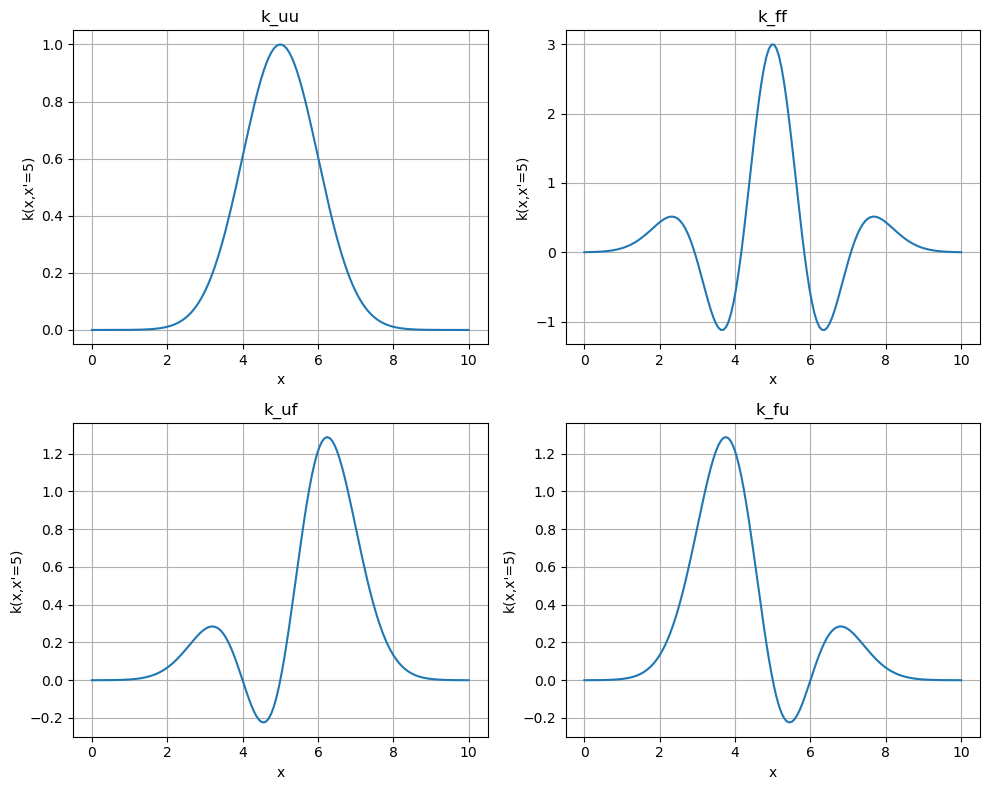

In [82]:
X_star = np.linspace(0,10,150).reshape(-1,1)
point = np.array([[5]])
params = [1,1,1,1,1]
kernel_kuu = model.k_uu(X_star,point,params)
kernel_kff = model.k_ff(X_star,point,params)
kernel_kuf = model.k_uf(X_star,point,params)
kernel_kfu = model.k_fu(X_star,point,params)

fig, ax = plt.subplots(2,2,figsize=(10,8))
ax[0,0].plot(X_star,kernel_kuu)
ax[0,0].set_title("k_uu")
ax[0,1].plot(X_star,kernel_kff)
ax[0,1].set_title("k_ff")
ax[1,0].plot(X_star,kernel_kuf)
ax[1,0].set_title("k_uf")
ax[1,1].plot(X_star,kernel_kfu)
ax[1,1].set_title("k_fu")
for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].set_xlabel("x")
        ax[i,j].set_ylabel("k(x,x'=5)")
plt.tight_layout()

